In [1]:
%load_ext autoreload
%autoreload 2

import os
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import animation

import numpy as np
import pandas as pd
from malr_grf_helper import MALRHelper
from malr_animating import TraceAnimator

### Movement Direction Labeling

In [3]:
#metrica_files = ["match1_action.csv", "match2_action.csv", "match3_test_action.csv", "match3_valid_action.csv"]
# metrica_files = ["match1_action.csv", "match2_action.csv", "match3_valid_action.csv"]
#  ["match3_test_action.csv"]
metrica_files = ["match1_action.csv", "match2_action.csv", "match3_valid_action.csv"] # train data
metrica_paths = [f"./metrica/{f}" for f in metrica_files]

helper = MALRHelper(data_paths=metrica_paths)
helper.obs_encoder(dataset = "dataset")

/user/hyunwoo/inverse_learning/metrica/malr_grf_helper.py:160: DtypeWarning: Columns (236,241,245,251,254,256,279,281,282,285,287,289) have mixed types. Specify dtype option on import or set low_memory=False.
  match_traces = pd.read_csv(file_path, header=0) # 기존 csv에서 데이터를 읽어옴\
Processing frames: 100%|██████████| 58001/58001 [1:12:40<00:00, 13.30it/s] 
/user/hyunwoo/inverse_learning/metrica/malr_grf_helper.py:160: DtypeWarning: Columns (227,234,238,240,263,265,267,269) have mixed types. Specify dtype option on import or set low_memory=False.
  match_traces = pd.read_csv(file_path, header=0) # 기존 csv에서 데이터를 읽어옴\
Processing frames: 100%|██████████| 27864/27864 [2:00:36<00:00,  3.85it/s]  


In [4]:

metrica_files = ["match3_test_action.csv"]
metrica_paths = [f"./metrica/{f}" for f in metrica_files]

helper = MALRHelper(data_paths=metrica_paths)
helper.obs_encoder(dataset = "test_dataset")

/user/hyunwoo/inverse_learning/metrica/malr_grf_helper.py:160: DtypeWarning: Columns (293,295,298,299,302,304,306,308,310,311,335,337,338,339,343,345,347,348,351,353) have mixed types. Specify dtype option on import or set low_memory=False.
  match_traces = pd.read_csv(file_path, header=0) # 기존 csv에서 데이터를 읽어옴\
Processing frames: 100%|██████████| 29639/29639 [23:01<00:00, 21.46it/s]


In [4]:
metrica_files = ["match1.csv", "match2.csv", "match3_test.csv", "match3_valid.csv"]
metrica_paths = [f"./metrica/{f}" for f in metrica_files]

helper = MALRHelper(data_paths=metrica_paths)
helper.processing_action_labels()

  0%|          | 0/4 [00:00<?, ?it/s]/user/hyunwoo/inverse_learning/metrica/malr_grf_helper.py:292: DtypeWarning: Columns (236,241,245,251,254,256,279,281,282,285,287,289) have mixed types. Specify dtype option on import or set low_memory=False.
  y_cols = [c for c in match_traces.columns if c.endswith("_y")]
 25%|██▌       | 1/4 [00:24<01:14, 24.88s/it]/user/hyunwoo/inverse_learning/metrica/malr_grf_helper.py:292: DtypeWarning: Columns (227,234,238,240,263,265,267,269) have mixed types. Specify dtype option on import or set low_memory=False.
  y_cols = [c for c in match_traces.columns if c.endswith("_y")]
 50%|█████     | 2/4 [00:49<00:49, 24.58s/it]/user/hyunwoo/inverse_learning/metrica/malr_grf_helper.py:292: DtypeWarning: Columns (293,295,298,299,302,304,306,308,310,311,335,337,338,339,343,345,347,348,351,353) have mixed types. Specify dtype option on import or set low_memory=False.
  y_cols = [c for c in match_traces.columns if c.endswith("_y")]
100%|██████████| 4/4 [01:14<00:00, 

In [6]:
df = pd.read_csv("./metrica/match3_test_action.csv")

/tmp/ipykernel_231562/199399390.py:1: DtypeWarning: Columns (293,295,298,299,302,304,306,308,310,311,335,337,338,339,343,345,347,348,351,353) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./metrica/match3_test_action.csv")


              A11_action  A01_action  A02_action  A04_action  A05_action  \
Bottom              1442        2420        2127        2123         872   
Bottom-left         3095        3082        2072        1846         874   
Bottom-right        1034        2492        1960        3037        1288   
Idle                 493          35          28          35          13   
Left                3000        2578        1969        3041        1435   
Right               3623        3900        3087        3563        1469   
Top                 2992        2213        2304        2122         610   
Top-left            4133        2050        1898        3322         828   
Top-right           1653        2695        2063        2376         687   

              A06_action  A07_action  A08_action  A10_action  A12_action  ...  \
Bottom              3248        3162        1136         881        2572  ...   
Bottom-left         2850        2560         948         705        2568  ...

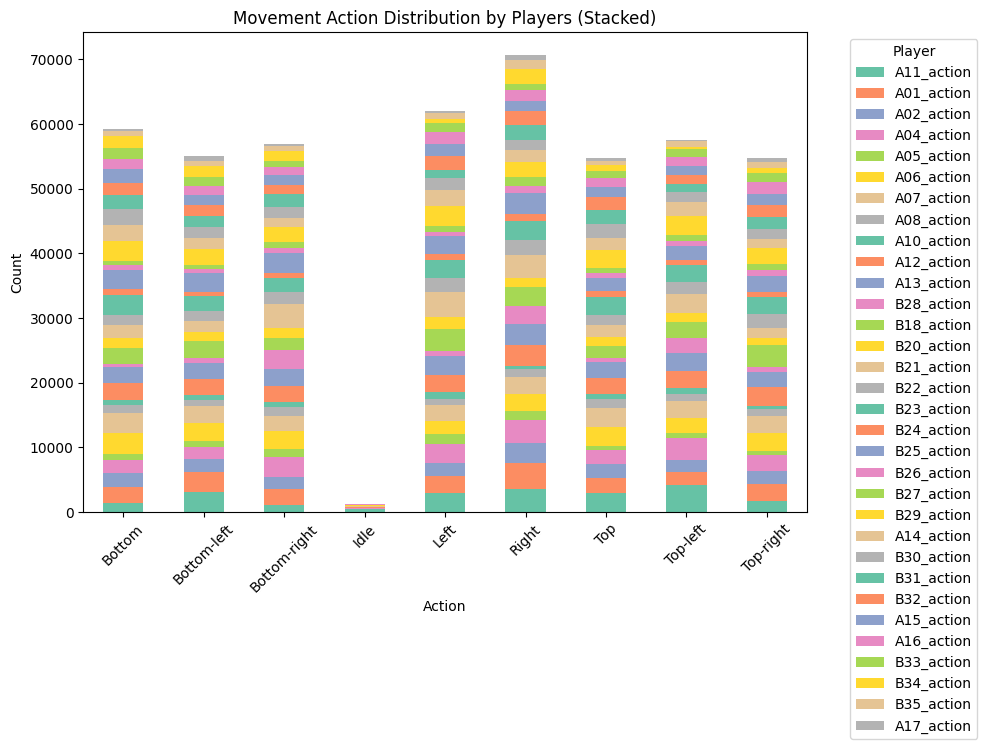

In [7]:
action_cols = [p for p in df.columns if p.endswith("_action")]
value_counts_result = df[action_cols].apply(pd.Series.value_counts)
print(value_counts_result) # class x player

value_counts_result = value_counts_result.fillna(0)

num_players = value_counts_result.shape[1]
colors = sns.color_palette("Set2", num_players)  # 고유한 색상 생성

ax = value_counts_result.plot(kind='bar', stacked=True, figsize=(10, 7), color=colors)

# 그래프 설정
plt.title('Movement Action Distribution by Players (Stacked)')
plt.xlabel('Action')
plt.ylabel('Count')
plt.legend(title='Player', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# 그래프 보여주기
plt.show()

### Animating

In [ ]:
df[df.episode == 1]["A11_action"]

0            Right
1            Right
2      Bottom-left
3      Bottom-left
4      Bottom-left
          ...     
565          Right
566          Right
567          Right
568          Right
569           Idle
Name: A11_action, Length: 570, dtype: object

UnboundLocalError: local variable 'fig' referenced before assignment

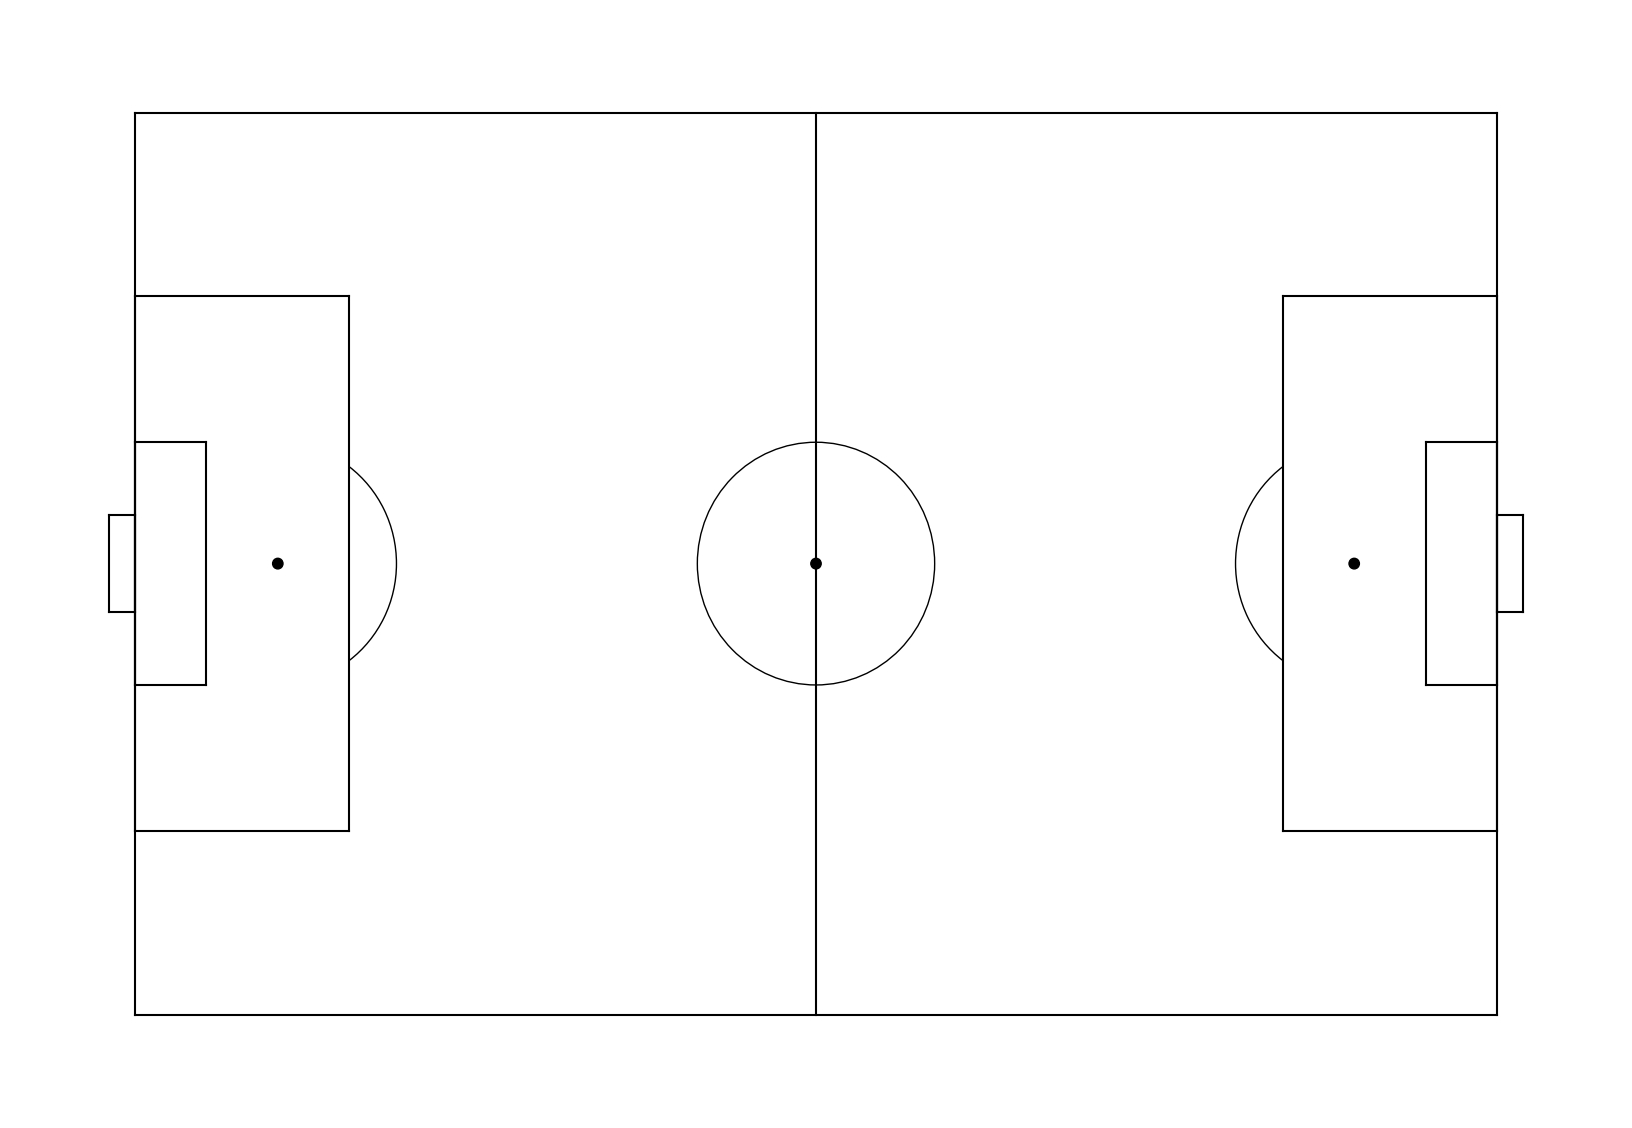

In [ ]:
i0 = 0
i1 = 569

animator = TraceAnimator(
    match_ret={"main": df[i0:i1]},
    mask=None,
    show_episodes=True,
    show_events=False,
    show_frames=False,
    annot_cols=None,
)
anim = animator.run()

path = f"../animations/malr_label_test.mp4"
if not os.path.exists("animations"):
    os.makedirs("animations")

writer = animation.FFMpegWriter(fps=10)
anim.save(path, writer=writer)